# Analyzation of the Results

This file is used to evaluate the results of the training, utilizing the logs.txt that will be written in the log-folder. In order to use it:

- move the logs.txt in the same folder as this script
- execute the script

Note: For this the script has to be executed on an external PC, not on the server. You can get the logs.txt using the 'scp'-command in Linux

In [26]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

# set the matplotlib-parameters, manipulating the fonts for all the plots coming hereafter
matplotlib.rcParams['lines.linewidth'] = 2
#matplotlib.rcParams['lines.color'] = 'r'

## First Step: Parse the data

Save the input-parameters (the parameters of ESPnet) in X and the results we used in Y

In [27]:
X = None
Y = None
params = []

with open('logs.txt', 'r') as f:
    
    def isnum(n):
        """Check if the argument is a float or an integer. Used for finding the rows with the parameters."""
        try:
            float(n)
            return True
        except ValueError:
            return False
        
    def giveparams(row):
        """Return the current line as a numpy-row-vector."""
        v = []
        for r in row:
            v.append(float(r))
        return np.array(v)
        
    
    for line in f:
        line = line.split()

        if line and isnum(line[0]): 
            # we can do this because the enumeration in the beginning also uses colons ':'
            if X is None:
                X = giveparams(line)
            else:
                X = np.vstack((X, giveparams(line)))
        elif line and line[0].startswith('Result:'):
            if Y is None:
                Y = float(line[1])
            else:
                Y = np.vstack((Y, float(line[1])))
        elif line and len(line) > 1 and ':' in line[0]:
            # getting parameter names
            params.append(line[1])



## Second step: Observe the data

Take a closer look at the data by getting them into a neat dataframe format

In [28]:
import pandas as pd

df = pd.DataFrame(np.hstack((X, Y)), columns = params + ["WER"]) # WER are the results, i.e. the Y-vector
df

,maxlen_out,dunits,lm_epochs,maxlenratio,ctc_weight,N,maxlen_in,dlayers,minlenratio,lm_units,...,samp_prob,lm_layers,epochs,eunits,aconv_chans,eprojs,adim,lm_maxlen,elayers,WER
0,150.0,300.0,20.0,0.0,0.300000,0.0,800.0,1.0,0.0,650.0,...,0.0,2.0,15.0,320.0,10.0,320.0,320.0,150.0,6.0,10.4
1,150.0,290.0,20.0,0.0,0.300000,0.0,800.0,1.0,0.0,650.0,...,0.0,3.0,15.0,300.0,10.0,320.0,300.0,150.0,6.0,9.3
2,150.0,300.0,10.0,0.0,0.300000,0.0,800.0,1.0,0.0,650.0,...,0.0,6.0,15.0,320.0,10.0,320.0,320.0,150.0,6.0,62.4
3,150.0,300.0,30.0,0.0,0.300000,0.0,800.0,1.0,0.0,650.0,...,0.0,6.0,15.0,320.0,10.0,320.0,320.0,150.0,6.0,94.4
4,250.0,200.0,10.0,0.0,1.000000,0.0,600.0,5.0,0.0,450.0,...,0.0,1.0,20.0,400.0,20.0,400.0,250.0,50.0,10.0,85.7
5,205.0,374.0,26.0,0.0,0.360026,0.0,601.0,4.0,0.0,654.0,...,0.0,3.0,8.0,275.0,5.0,252.0,383.0,235.0,2.0,13.6
6,138.0,204.0,27.0,0.0,0.079285,0.0,845.0,4.0,0.0,691.0,...,0.0,1.0,12.0,349.0,1.0,283.0,258.0,165.0,2.0,14.6
7,215.0,368.0,11.0,0.0,0.703327,0.0,640.0,4.0,0.0,685.0,...,0.0,2.0,17.0,392.0,14.0,365.0,275.0,205.0,9.0,17.4
8,160.0,277.0,25.0,0.0,0.960409,0.0,744.0,1.0,0.0,656.0,...,0.0,3.0,16.0,260.0,10.0,351.0,351.0,56.0,1.0,26.0
9,231.0,381.0,23.0,0.0,0.690833,0.0,788.0,4.0,0.0,642.0,...,0.0,2.0,13.0,397.0,7.0,257.0,289.0,234.0,3.0,11.4


## Third Step: Find all the Changes and Compare

Parse through the rows and do find changes in rows

In [29]:
def get_difference(X, i):
    # get the difference in between the rows and return 
    
    row = X[i, :]
    old_row = X[i-1, :]
        
    names = []
    changes = []
        
    diff = old_row == row

    for (j, entry) in enumerate(diff):
        if entry == False:
            names.append((params[j]))
            changes.append(row[j])
    return names, changes, np.logical_not(diff)

all_changes = []
old_row = None # can be omitted, using all_changes alone

for i in range(1, X.shape[0]):
    test = get_difference(X, i)
    new_stack = np.vstack((np.hstack((X[i-1, test[2]], Y[i-1])), np.hstack((X[i, test[2]], Y[i]))))
    all_changes.append(pd.DataFrame(new_stack, columns = test[0] + ["WER"]))

all_changes # LUDWIG

[   dunits  mtlalpha  lm_layers  eunits   adim   WER
 0   300.0       0.5        2.0   320.0  320.0  10.4
 1   290.0       0.4        3.0   300.0  300.0   9.3,
    dunits  lm_epochs  lm_weight  mtlalpha  lm_layers  eunits   adim   WER
 0   290.0       20.0        1.0       0.4        3.0   300.0  300.0   9.3
 1   300.0       10.0        0.0       0.0        6.0   320.0  320.0  62.4,
    lm_epochs  lm_weight   WER
 0       10.0        0.0  62.4
 1       30.0        1.0  94.4,
    maxlen_out  dunits  lm_epochs  ctc_weight  maxlen_in  dlayers  lm_units  \
 0       150.0   300.0       30.0         0.3      800.0      1.0     650.0   
 1       250.0   200.0       10.0         1.0      600.0      5.0     450.0   
 
    beam_size  mtlalpha  penalty  ...   aconv_filts  lm_layers  epochs  eunits  \
 0       20.0      0.00      0.0  ...         100.0        6.0    15.0   320.0   
 1       30.0      0.99      1.0  ...          30.0        1.0    20.0   400.0   
 
    aconv_chans  eprojs   adim  l

## Fourth Step: Plot Results

It is never a mistake here to see the temporal evolution of the results, to see how the algorithm performed in general. Therefore, here we plot Y. Y already has the correct temporal evolution given by how we write the logs.txt.

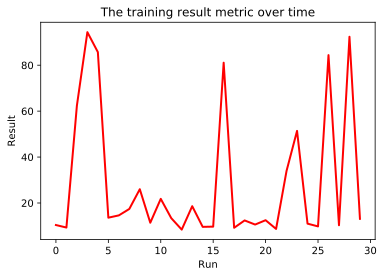

In [30]:
plt.title('The training result metric over time')
plt.xlabel('Run')
plt.ylabel('Result')
plt.plot(np.linspace(0, len(Y)-1, len(Y)), Y, color = 'r', linewidth = 2)
plt.show()

## Fifth Step: Normalize the Data

Self explaining. We use the numpy arrays to have an easier game later on.

In [31]:
X_mean = np.mean(X, axis = 0)
X_var = np.var(X, axis = 0)

nan_indices = [i for i, x in enumerate(np.isnan(X_var)) if x]
        
X = X - X_mean 

for i in nan_indices:
    Xnew = np.delete(Xnew, i, axis = 0)
    X_var = np.delete(X_var, i, axis = 0)
    Y = np.delete(Y, i)

# get out all the zeros
eps = 1.e-6
for (i, val) in enumerate(X_var):
    if val < eps:
        X_var[i] = 1

X = X / X_var

#Y_mean = np.mean(Y, axis = 0)
#Y_var = np.var(Y, axis = 0)
#Y = (Y - Y_mean)/Y_var


## Sixth Step: Plot Correlations

We want to know which parameters contributed more than others, hence we are going to correlate them with the results. We can omit the less important ones during training, finding better results faster.

### Please note the following structure:
The parameters and their correlation is shown in all the rows/columns up until the last one (remember that a correlation matrix is symme. The results are in the last row/column

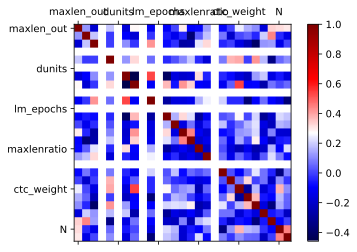

In [32]:
Z = np.hstack((X, Y))
# We append the Y vecotor at the end. Z now has the 'features' as columns and tests/samples as rows. The last feature
# is the result. We perform now a correlation with all these entries and try to find out how the other features
# correlate with the result. 

correlations = np.corrcoef(Z.T) # .T is the transpose, because the corrcoef-function demands this

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, cmap = 'seismic')
fig.colorbar(cax)

params.append('Result')
ax.set_xticklabels(['']+params)
ax.set_yticklabels(['']+params)

plt.show()

## Seventh Step: Analytical Evaluation

We simply evaluate analytically by setting a threshold and casting out all the parameters that are below the threshold, naming the others.


In [33]:
threshold = 0.2 # between -1 and 1, see definition of correlation coefficient
good_parameters = []
critical_line = correlations[-1, :-2] # we go until -2, because we do not want the last entry, it is 1 anyways 
# either the last row or the last column, since we took the results as the last feature

for i, entry in enumerate(critical_line):
    if threshold <= abs(entry):
        good_parameters.append(params[i]) # getting the names
        
print(good_parameters)

['maxlen_out', 'lm_units', 'lm_batchsize', 'adim']


## Eigth Step: Use other Correlation Coefficients

This was, in the tedlium test row, not very helpful so far. 
The casual correlation coefficient can find linear correlations, i.e. it can state whether two stochastic test row samples depend linear on each other. 

Since we utilize a neural network here, or better a series of neural networks of rather complicated structure, we naturally can expect nonlinear interdependencies. Hence, we can try **Spearman's Rho** to check whether we can find nonlinear interdependencies. 

(27, 27)


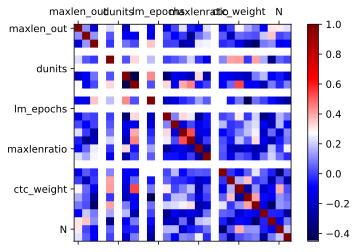

In [34]:
import scipy
import scipy.stats as stats

correlations_new, _ = stats.spearmanr(Z)
print(correlations_new.shape)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations_new, cmap = 'seismic')
fig.colorbar(cax)

params.append('Result')
ax.set_xticklabels(['']+params)
ax.set_yticklabels(['']+params)

plt.show()

## Ninth Step: Again Analytical Analization

After having nonlinear interdependencies, try again

In [35]:
threshold = 0.2 # between -1 and 1, see definition of correlation coefficient
good_parameters = []
critical_line = correlations_new[-1, :-2] # we go until -2, because we do not want the last entry, it is 1 anyways 
# either the last row or the last column, since we took the results as the last feature

for i, entry in enumerate(critical_line):
    if threshold <= abs(entry):
        good_parameters.append(params[i]) # getting the names
        
print(good_parameters)

['maxlen_out', 'lm_units', 'lm_batchsize', 'epochs', 'adim']


## Tenth Step: Take a Closer Look at the Differences

Plot all the different stages and the elements that have changed

In [36]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    for df in all_changes:
        display(df)

,dunits,mtlalpha,lm_layers,eunits,adim,WER
0,300.0,0.5,2.0,320.0,320.0,10.4
1,290.0,0.4,3.0,300.0,300.0,9.3


,dunits,lm_epochs,lm_weight,mtlalpha,lm_layers,eunits,adim,WER
0,290.0,20.0,1.0,0.4,3.0,300.0,300.0,9.3
1,300.0,10.0,0.0,0.0,6.0,320.0,320.0,62.4


,lm_epochs,lm_weight,WER
0,10.0,0.0,62.4
1,30.0,1.0,94.4


,maxlen_out,dunits,lm_epochs,ctc_weight,maxlen_in,dlayers,lm_units,beam_size,mtlalpha,penalty,lm_batchsize,aconv_filts,lm_layers,epochs,eunits,aconv_chans,eprojs,adim,lm_maxlen,elayers,WER
0,150.0,300.0,30.0,0.3,800.0,1.0,650.0,20.0,0.00,0.0,1024.0,100.0,6.0,15.0,320.0,10.0,320.0,320.0,150.0,6.0,94.4
1,250.0,200.0,10.0,1.0,600.0,5.0,450.0,30.0,0.99,1.0,800.0,30.0,1.0,20.0,400.0,20.0,400.0,250.0,50.0,10.0,85.7


,maxlen_out,dunits,lm_epochs,ctc_weight,maxlen_in,dlayers,lm_units,beam_size,lm_weight,mtlalpha,penalty,lm_batchsize,aconv_filts,lm_layers,epochs,eunits,aconv_chans,eprojs,adim,lm_maxlen,elayers,WER
0,250.0,200.0,10.0,1.000000,600.0,5.0,450.0,30.0,1.000000,0.990000,1.000000,800.0,30.0,1.0,20.0,400.0,20.0,400.0,250.0,50.0,10.0,85.7
1,205.0,374.0,26.0,0.360026,601.0,4.0,654.0,18.0,0.353245,0.898323,0.329925,1066.0,37.0,3.0,8.0,275.0,5.0,252.0,383.0,235.0,2.0,13.6


,maxlen_out,dunits,lm_epochs,ctc_weight,maxlen_in,lm_units,beam_size,lm_weight,mtlalpha,penalty,lm_batchsize,aconv_filts,lm_layers,epochs,eunits,aconv_chans,eprojs,adim,lm_maxlen,WER
0,205.0,374.0,26.0,0.360026,601.0,654.0,18.0,0.353245,0.898323,0.329925,1066.0,37.0,3.0,8.0,275.0,5.0,252.0,383.0,235.0,13.6
1,138.0,204.0,27.0,0.079285,845.0,691.0,26.0,0.060476,0.927683,0.973353,1010.0,113.0,1.0,12.0,349.0,1.0,283.0,258.0,165.0,14.6


,maxlen_out,dunits,lm_epochs,ctc_weight,maxlen_in,lm_units,beam_size,lm_weight,mtlalpha,penalty,lm_batchsize,aconv_filts,lm_layers,epochs,eunits,aconv_chans,eprojs,adim,lm_maxlen,elayers,WER
0,138.0,204.0,27.0,0.079285,845.0,691.0,26.0,0.060476,0.927683,0.973353,1010.0,113.0,1.0,12.0,349.0,1.0,283.0,258.0,165.0,2.0,14.6
1,215.0,368.0,11.0,0.703327,640.0,685.0,25.0,0.099662,0.857379,0.552025,922.0,125.0,2.0,17.0,392.0,14.0,365.0,275.0,205.0,9.0,17.4


,maxlen_out,dunits,lm_epochs,ctc_weight,maxlen_in,dlayers,lm_units,beam_size,lm_weight,mtlalpha,penalty,lm_batchsize,aconv_filts,lm_layers,epochs,eunits,aconv_chans,eprojs,adim,lm_maxlen,elayers,WER
0,215.0,368.0,11.0,0.703327,640.0,4.0,685.0,25.0,0.099662,0.857379,0.552025,922.0,125.0,2.0,17.0,392.0,14.0,365.0,275.0,205.0,9.0,17.4
1,160.0,277.0,25.0,0.960409,744.0,1.0,656.0,6.0,0.232361,0.096007,0.334426,932.0,126.0,3.0,16.0,260.0,10.0,351.0,351.0,56.0,1.0,26.0


,maxlen_out,dunits,lm_epochs,ctc_weight,maxlen_in,dlayers,lm_units,beam_size,lm_weight,mtlalpha,penalty,lm_batchsize,aconv_filts,lm_layers,epochs,eunits,aconv_chans,eprojs,adim,lm_maxlen,elayers,WER
0,160.0,277.0,25.0,0.960409,744.0,1.0,656.0,6.0,0.232361,0.096007,0.334426,932.0,126.0,3.0,16.0,260.0,10.0,351.0,351.0,56.0,1.0,26.0
1,231.0,381.0,23.0,0.690833,788.0,4.0,642.0,11.0,0.084118,0.414937,0.112907,1092.0,120.0,2.0,13.0,397.0,7.0,257.0,289.0,234.0,3.0,11.4


,maxlen_out,dunits,lm_epochs,ctc_weight,maxlen_in,dlayers,lm_units,beam_size,lm_weight,mtlalpha,penalty,lm_batchsize,aconv_filts,lm_layers,epochs,eunits,aconv_chans,eprojs,adim,lm_maxlen,elayers,WER
0,231.0,381.0,23.0,0.690833,788.0,4.0,642.0,11.0,0.084118,0.414937,0.112907,1092.0,120.0,2.0,13.0,397.0,7.0,257.0,289.0,234.0,3.0,11.4
1,115.0,301.0,10.0,0.006922,692.0,1.0,454.0,25.0,0.117977,0.910548,0.914578,1016.0,36.0,3.0,6.0,254.0,13.0,364.0,273.0,151.0,2.0,21.8


,maxlen_out,dunits,lm_epochs,ctc_weight,maxlen_in,dlayers,lm_units,beam_size,lm_weight,mtlalpha,penalty,lm_batchsize,aconv_filts,epochs,eunits,aconv_chans,eprojs,adim,lm_maxlen,elayers,WER
0,115.0,301.0,10.0,0.006922,692.0,1.0,454.0,25.0,0.117977,0.910548,0.914578,1016.0,36.0,6.0,254.0,13.0,364.0,273.0,151.0,2.0,21.8
1,126.0,293.0,29.0,0.421553,725.0,4.0,789.0,24.0,0.217115,0.510293,0.379183,1036.0,116.0,7.0,380.0,7.0,326.0,280.0,62.0,7.0,13.4


,maxlen_out,dunits,lm_epochs,ctc_weight,maxlen_in,dlayers,lm_units,beam_size,lm_weight,mtlalpha,penalty,lm_batchsize,aconv_filts,lm_layers,epochs,eunits,aconv_chans,eprojs,adim,lm_maxlen,elayers,WER
0,126.0,293.0,29.0,0.421553,725.0,4.0,789.0,24.0,0.217115,0.510293,0.379183,1036.0,116.0,3.0,7.0,380.0,7.0,326.0,280.0,62.0,7.0,13.4
1,187.0,343.0,26.0,0.156444,657.0,1.0,633.0,22.0,0.681652,0.179127,0.081030,808.0,138.0,1.0,19.0,331.0,12.0,280.0,317.0,84.0,9.0,8.4


,maxlen_out,dunits,lm_epochs,ctc_weight,maxlen_in,dlayers,lm_units,beam_size,lm_weight,mtlalpha,penalty,lm_batchsize,aconv_filts,lm_layers,epochs,eunits,aconv_chans,eprojs,adim,elayers,WER
0,187.0,343.0,26.0,0.156444,657.0,1.0,633.0,22.0,0.681652,0.179127,0.081030,808.0,138.0,1.0,19.0,331.0,12.0,280.0,317.0,9.0,8.4
1,148.0,310.0,15.0,0.673808,813.0,2.0,677.0,9.0,0.789062,0.870347,0.597341,1131.0,63.0,5.0,17.0,302.0,18.0,330.0,269.0,1.0,18.6


,maxlen_out,dunits,lm_epochs,ctc_weight,maxlen_in,lm_units,beam_size,lm_weight,mtlalpha,penalty,lm_batchsize,aconv_filts,lm_layers,epochs,eunits,aconv_chans,eprojs,adim,lm_maxlen,elayers,WER
0,148.0,310.0,15.0,0.673808,813.0,677.0,9.0,0.789062,0.870347,0.597341,1131.0,63.0,5.0,17.0,302.0,18.0,330.0,269.0,84.0,1.0,18.6
1,215.0,270.0,17.0,0.462100,829.0,712.0,7.0,0.219080,0.457567,0.053943,944.0,66.0,2.0,16.0,394.0,1.0,303.0,325.0,232.0,6.0,9.6


,maxlen_out,dunits,lm_epochs,ctc_weight,maxlen_in,dlayers,lm_units,beam_size,lm_weight,mtlalpha,penalty,lm_batchsize,aconv_filts,lm_layers,epochs,eunits,aconv_chans,eprojs,adim,lm_maxlen,elayers,WER
0,215.0,270.0,17.0,0.462100,829.0,2.0,712.0,7.0,0.219080,0.457567,0.053943,944.0,66.0,2.0,16.0,394.0,1.0,303.0,325.0,232.0,6.0,9.6
1,152.0,222.0,14.0,0.139821,657.0,3.0,624.0,20.0,0.586617,0.616062,0.925834,843.0,129.0,4.0,15.0,269.0,14.0,260.0,373.0,96.0,5.0,9.7


,maxlen_out,dunits,lm_epochs,ctc_weight,maxlen_in,lm_units,beam_size,lm_weight,mtlalpha,penalty,lm_batchsize,aconv_filts,epochs,eunits,aconv_chans,eprojs,adim,lm_maxlen,elayers,WER
0,152.0,222.0,14.0,0.139821,657.0,624.0,20.0,0.586617,0.616062,0.925834,843.0,129.0,15.0,269.0,14.0,260.0,373.0,96.0,5.0,9.7
1,231.0,338.0,29.0,0.530252,618.0,565.0,26.0,0.930256,0.548724,0.199899,1119.0,142.0,8.0,318.0,12.0,321.0,255.0,186.0,6.0,81.1


,maxlen_out,dunits,lm_epochs,ctc_weight,maxlen_in,dlayers,lm_units,beam_size,lm_weight,mtlalpha,penalty,lm_batchsize,aconv_filts,epochs,eunits,aconv_chans,eprojs,adim,lm_maxlen,elayers,WER
0,231.0,338.0,29.0,0.530252,618.0,3.0,565.0,26.0,0.930256,0.548724,0.199899,1119.0,142.0,8.0,318.0,12.0,321.0,255.0,186.0,6.0,81.1
1,130.0,243.0,11.0,0.971361,658.0,4.0,486.0,23.0,0.937152,0.291501,0.932602,971.0,44.0,19.0,384.0,11.0,352.0,342.0,65.0,5.0,9.2


,maxlen_out,dunits,lm_epochs,ctc_weight,maxlen_in,lm_units,beam_size,lm_weight,mtlalpha,penalty,lm_batchsize,aconv_filts,epochs,eunits,aconv_chans,eprojs,adim,lm_maxlen,elayers,WER
0,130.0,243.0,11.0,0.971361,658.0,486.0,23.0,0.937152,0.291501,0.932602,971.0,44.0,19.0,384.0,11.0,352.0,342.0,65.0,5.0,9.2
1,183.0,209.0,13.0,0.284063,689.0,708.0,15.0,0.980751,0.439582,0.523638,900.0,126.0,5.0,376.0,3.0,307.0,273.0,105.0,3.0,12.4


,maxlen_out,dunits,lm_epochs,ctc_weight,maxlen_in,dlayers,lm_units,beam_size,lm_weight,mtlalpha,penalty,lm_batchsize,aconv_filts,lm_layers,epochs,eunits,aconv_chans,eprojs,adim,lm_maxlen,elayers,WER
0,183.0,209.0,13.0,0.284063,689.0,4.0,708.0,15.0,0.980751,0.439582,0.523638,900.0,126.0,4.0,5.0,376.0,3.0,307.0,273.0,105.0,3.0,12.4
1,211.0,304.0,15.0,0.875112,968.0,1.0,799.0,21.0,0.531717,0.926041,0.851970,869.0,114.0,5.0,10.0,327.0,1.0,374.0,348.0,71.0,4.0,10.6


,maxlen_out,dunits,lm_epochs,ctc_weight,maxlen_in,lm_units,beam_size,lm_weight,mtlalpha,penalty,lm_batchsize,aconv_filts,lm_layers,epochs,eunits,aconv_chans,eprojs,adim,lm_maxlen,elayers,WER
0,211.0,304.0,15.0,0.875112,968.0,799.0,21.0,0.531717,0.926041,0.851970,869.0,114.0,5.0,10.0,327.0,1.0,374.0,348.0,71.0,4.0,10.6
1,165.0,347.0,20.0,0.090951,895.0,617.0,11.0,0.621816,0.084576,0.038772,874.0,101.0,1.0,6.0,253.0,18.0,333.0,354.0,190.0,6.0,12.5


,maxlen_out,dunits,lm_epochs,ctc_weight,maxlen_in,lm_units,lm_weight,mtlalpha,penalty,lm_batchsize,aconv_filts,lm_layers,epochs,eunits,aconv_chans,eprojs,adim,lm_maxlen,elayers,WER
0,165.0,347.0,20.0,0.090951,895.0,617.0,0.621816,0.084576,0.038772,874.0,101.0,1.0,6.0,253.0,18.0,333.0,354.0,190.0,6.0,12.5
1,116.0,292.0,25.0,0.638012,946.0,794.0,0.607598,0.163625,0.909393,1166.0,64.0,3.0,12.0,303.0,8.0,343.0,340.0,67.0,7.0,8.7


,maxlen_out,dunits,lm_epochs,ctc_weight,maxlen_in,dlayers,lm_units,beam_size,lm_weight,mtlalpha,penalty,lm_batchsize,aconv_filts,lm_layers,epochs,eunits,aconv_chans,eprojs,adim,lm_maxlen,WER
0,116.0,292.0,25.0,0.638012,946.0,1.0,794.0,11.0,0.607598,0.163625,0.909393,1166.0,64.0,3.0,12.0,303.0,8.0,343.0,340.0,67.0,8.7
1,248.0,369.0,10.0,0.182331,600.0,2.0,489.0,15.0,0.805414,0.808854,0.923604,861.0,147.0,5.0,5.0,388.0,15.0,380.0,325.0,231.0,34.0


,maxlen_out,dunits,ctc_weight,maxlen_in,dlayers,lm_units,beam_size,lm_weight,mtlalpha,penalty,lm_batchsize,aconv_filts,lm_layers,epochs,eunits,aconv_chans,eprojs,adim,lm_maxlen,elayers,WER
0,248.0,369.0,0.182331,600.0,2.0,489.0,15.0,0.805414,0.808854,0.923604,861.0,147.0,5.0,5.0,388.0,15.0,380.0,325.0,231.0,7.0,34.0
1,244.0,215.0,0.123483,863.0,1.0,638.0,10.0,0.329168,0.554029,0.244384,1186.0,80.0,1.0,11.0,291.0,17.0,322.0,299.0,68.0,9.0,51.4


,maxlen_out,dunits,lm_epochs,ctc_weight,maxlen_in,dlayers,lm_units,lm_weight,mtlalpha,penalty,lm_batchsize,aconv_filts,lm_layers,epochs,eunits,aconv_chans,eprojs,adim,lm_maxlen,elayers,WER
0,244.0,215.0,10.0,0.123483,863.0,1.0,638.0,0.329168,0.554029,0.244384,1186.0,80.0,1.0,11.0,291.0,17.0,322.0,299.0,68.0,9.0,51.4
1,178.0,282.0,24.0,0.496032,754.0,2.0,573.0,0.007463,0.826258,0.325435,1020.0,145.0,2.0,19.0,269.0,18.0,276.0,368.0,226.0,5.0,11.0


,maxlen_out,dunits,lm_epochs,ctc_weight,maxlen_in,dlayers,lm_units,beam_size,lm_weight,mtlalpha,penalty,lm_batchsize,aconv_filts,lm_layers,epochs,eunits,aconv_chans,eprojs,adim,lm_maxlen,WER
0,178.0,282.0,24.0,0.496032,754.0,2.0,573.0,10.0,0.007463,0.826258,0.325435,1020.0,145.0,2.0,19.0,269.0,18.0,276.0,368.0,226.0,11.0
1,175.0,302.0,25.0,0.956504,795.0,3.0,728.0,21.0,0.286717,0.738380,0.495275,855.0,102.0,5.0,18.0,391.0,16.0,372.0,396.0,52.0,9.8


,maxlen_out,dunits,lm_epochs,ctc_weight,maxlen_in,lm_units,beam_size,lm_weight,mtlalpha,penalty,lm_batchsize,aconv_filts,lm_layers,epochs,eunits,aconv_chans,eprojs,adim,lm_maxlen,elayers,WER
0,175.0,302.0,25.0,0.956504,795.0,728.0,21.0,0.286717,0.73838,0.495275,855.0,102.0,5.0,18.0,391.0,16.0,372.0,396.0,52.0,5.0,9.8
1,185.0,313.0,14.0,0.816181,837.0,485.0,20.0,0.187523,0.54216,0.123707,1067.0,65.0,1.0,11.0,384.0,3.0,305.0,370.0,83.0,9.0,84.4


,maxlen_out,dunits,lm_epochs,ctc_weight,maxlen_in,lm_units,beam_size,lm_weight,mtlalpha,penalty,lm_batchsize,aconv_filts,lm_layers,epochs,eunits,aconv_chans,eprojs,adim,lm_maxlen,elayers,WER
0,185.0,313.0,14.0,0.816181,837.0,485.0,20.0,0.187523,0.542160,0.123707,1067.0,65.0,1.0,11.0,384.0,3.0,305.0,370.0,83.0,9.0,84.4
1,249.0,275.0,18.0,0.700466,922.0,732.0,15.0,0.426968,0.754341,0.176841,1059.0,79.0,5.0,15.0,275.0,17.0,392.0,290.0,166.0,4.0,10.3


,maxlen_out,dunits,lm_epochs,ctc_weight,maxlen_in,lm_units,beam_size,lm_weight,mtlalpha,penalty,lm_batchsize,aconv_filts,lm_layers,epochs,eunits,aconv_chans,eprojs,adim,lm_maxlen,elayers,WER
0,249.0,275.0,18.0,0.700466,922.0,732.0,15.0,0.426968,0.754341,0.176841,1059.0,79.0,5.0,15.0,275.0,17.0,392.0,290.0,166.0,4.0,10.3
1,219.0,242.0,26.0,0.656005,778.0,694.0,11.0,0.494143,0.238190,0.931930,1119.0,121.0,3.0,11.0,329.0,6.0,288.0,308.0,206.0,9.0,92.4


,maxlen_out,dunits,lm_epochs,ctc_weight,maxlen_in,dlayers,lm_units,beam_size,lm_weight,mtlalpha,penalty,lm_batchsize,aconv_filts,lm_layers,epochs,eunits,aconv_chans,eprojs,adim,lm_maxlen,elayers,WER
0,219.0,242.0,26.0,0.656005,778.0,3.0,694.0,11.0,0.494143,0.238190,0.931930,1119.0,121.0,3.0,11.0,329.0,6.0,288.0,308.0,206.0,9.0,92.4
1,157.0,307.0,19.0,0.824326,925.0,2.0,653.0,15.0,0.729851,0.552784,0.656701,983.0,122.0,1.0,6.0,379.0,8.0,363.0,351.0,116.0,7.0,13.1


## Save all the Tables as Images

In [41]:
import matplotlib.pyplot as plt
from pandas.tools.plotting import table

for i in range(len(all_changes)):
    df = all_changes[i]
    df.to_html('step' + str(i) + '.html')

# Continue if desired results not yet found

## Find the largest steps in the WER

In [23]:
thres = 10
largest_steps = []
for i in range(1, Y.shape[0]):
    if Y[i] - Y[i-1] > thres:
        largest_steps.append(i-1)
        
largest_steps

[1, 2, 9, 12, 15, 21, 22, 25, 27]

In [24]:
all_changes[1]

,dunits,lm_epochs,lm_weight,mtlalpha,lm_layers,eunits,adim,WER
0,290.0,20.0,1.0,0.4,3.0,300.0,300.0,9.3
1,300.0,10.0,0.0,0.0,6.0,320.0,320.0,62.4


In [25]:
all_changes[2]

,lm_epochs,lm_weight,WER
0,10.0,0.0,62.4
1,30.0,1.0,94.4


In [26]:
all_changes[9]

,maxlen_out,dunits,lm_epochs,ctc_weight,maxlen_in,dlayers,lm_units,beam_size,lm_weight,mtlalpha,...,aconv_filts,lm_layers,epochs,eunits,aconv_chans,eprojs,adim,lm_maxlen,elayers,WER
0,231.0,381.0,23.0,0.690833,788.0,4.0,642.0,11.0,0.084118,0.414937,...,120.0,2.0,13.0,397.0,7.0,257.0,289.0,234.0,3.0,11.4
1,115.0,301.0,10.0,0.006922,692.0,1.0,454.0,25.0,0.117977,0.910548,...,36.0,3.0,6.0,254.0,13.0,364.0,273.0,151.0,2.0,21.8


## Seek correlations in largest steps

/Users/robertbaumgartner/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/robertbaumgartner/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


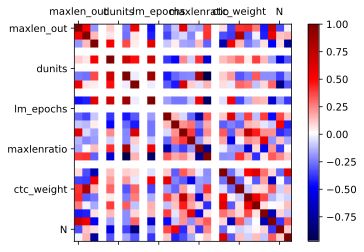

In [29]:
Xn = None
Yn = None
for i in largest_steps:
    if Xn is None:
        Xn = X[i:i+1, :]
        Yn = Y[i:i+1, :]
    else:
        Xn = np.vstack((Xn, X[i:i+1, :]))
        Yn = np.vstack((Yn, Y[i:i+1, :]))
        
Z = np.hstack((Xn, Yn))

correlations = np.corrcoef(Z.T) # .T is the transpose, because the corrcoef-function demands this

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, cmap = 'seismic')
fig.colorbar(cax)

params.append('Result')
ax.set_xticklabels(['']+params)
ax.set_yticklabels(['']+params)

plt.show()

## Again an analytical evaluation

In [33]:
threshold = 0.3 # between -1 and 1, see definition of correlation coefficient
good_parameters = []
critical_line = correlations[-1, :-2] # we go until -2, because we do not want the last entry, it is 1 anyways 
# either the last row or the last column, since we took the results as the last feature

for i, entry in enumerate(critical_line):
    if threshold <= abs(entry):
        good_parameters.append(params[i]) # getting the names
        
print(good_parameters)

['lm_epochs', 'ctc_weight', 'dlayers', 'lm_units', 'lm_weight', 'mtlalpha', 'lm_layers', 'epochs', 'lm_maxlen']


### Observation here: 
These are actually parameters that seem reasonable, rather than the surprising other ones. 
However, it shall be stated that here we threw out results and data that would be necessary. The data is however not enough, and given the fact that one training is really long it is not reasonable generating that many data